## Test monthly means with leap year for GNSS-RO data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date

In [2]:
import func as func

In [3]:
ds_obs = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')
ds_era5 = xr.open_dataset('FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds_erai = xr.open_dataset('erai.tp.monmean.nc')

In [4]:
obs_y = ds_obs.resample(time='M', keep_attrs=True).mean()
obs_y = obs_y.sel(lat=slice(-20,20))

#era_y = ds_era5.resample(time='Y', keep_attrs=True).mean()
era_y = ds_era5.sel(lat=slice(-20,20))

In [5]:
ds_obs

<xarray.Dataset>
Dimensions:  (lat: 13, lon: 72, time: 4383)
Coordinates:
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -30.0 -25.0 -20.0 -15.0 -10.0 ... 15.0 20.0 25.0 30.0
  * time     (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2018-12-31
Data variables:
    CP_T     (time, lat, lon) float32 ...
    CP_z     (time, lat, lon) float32 ...
    LR_T     (time, lat, lon) float32 ...
    LR_z     (time, lat, lon) float32 ...

In [6]:
#erai_y = ds_erai.resample(time='Y', keep_attrs=True).mean()
erai_y = ds_erai.sel(lat=slice(20,-20), time=slice('2007-01-01T00:00:00.000000000', '2018-12-31T00:00:00.000000000'))

In [7]:
#era_y_mean= f.year_mean(era_y)
#erai_y_mean = f.year_mean(erai_y)
#obs_y_mean = f.year_mean(obs_y, obs=True)

In [8]:
era_y_mean = func.w_average(era_y, ['ctpt', 'ctpz', 'tpt', 'tpz'])
erai_y_mean = func.w_average(erai_y, ['ctpt', 'ctpz', 'tpt', 'tpz'])
obs_y_mean = func.w_average(obs_y, ['CP_T', 'CP_z', 'LR_T', 'LR_z'])

In [9]:
len(erai_y_mean[0])

144

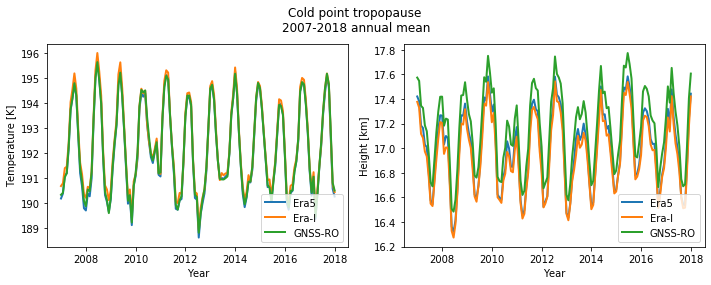

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('Cold point tropopause \n2007-2018 annual mean', fontsize=12)

yr = np.linspace(2007,2018,144)
lab1 = 'Era5'
lab2 = 'Era-I'
lab3 = 'GNSS-RO'

ax1.plot(yr,era_y_mean[0], lw = 2,label = lab1)
ax1.plot(yr, erai_y_mean[0], lw = 2, label = lab2)
ax1.plot(yr,obs_y_mean[0] , lw = 2, label  = lab3)
ax1.legend()
ax1.set(ylabel = 'Temperature [K]', xlabel = 'Year')


ax2.plot(yr, era_y_mean[1], lw=2, label = lab1)
ax2.plot(yr, erai_y_mean[1], lw=2, label = lab2)
ax2.plot(yr, obs_y_mean[1], lw = 2, label = lab3)
ax2.legend()
ax2.set(ylabel = 'Height [km]', xlabel='Year')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(top=2)
#plt.savefig('yearly_mean_cpt.png')

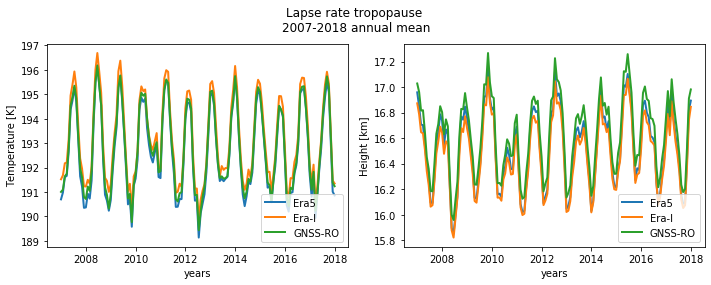

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('Lapse rate tropopause \n2007-2018 annual mean',fontsize=12)

yr = np.linspace(2007,2018,144)

ax1.plot(yr,era_y_mean[2], lw=2, label = lab1)
ax1.plot(yr, erai_y_mean[2], lw = 2,label = lab2)
ax1.plot(yr,obs_y_mean[2], lw = 2, label = lab3)
ax1.legend()
ax1.set(ylabel='Temperature [K]', xlabel='years')



ax2.plot(yr, era_y_mean[3], lw = 2,label = lab1)
ax2.plot(yr, erai_y_mean[3], lw = 2,label = lab2)
ax2.plot(yr, obs_y_mean[3], lw = 2,label = lab3)
ax2.legend()
ax2.set(ylabel='Height [km]', xlabel='years')

plt.tight_layout()
plt.subplots_adjust(top=0.85)

#plt.savefig('yearly_mean_lrt.png')

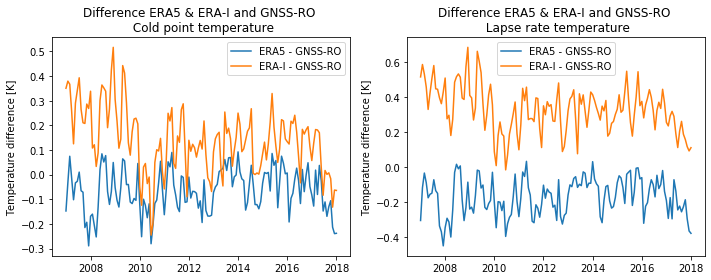

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
dlab1 = 'ERA5 - GNSS-RO'
dlab2 = 'ERA-I - GNSS-RO'

yr = np.linspace(2007,2018,144)

ax1.plot(yr,era_y_mean[0] - obs_y_mean[0], lw = 1.5, label = dlab1)
ax1.plot(yr, erai_y_mean[0] - obs_y_mean[0], lw = 1.5, label = dlab2)
#plt.ylim(-0.75,0.75)
ax1.set(title='Difference ERA5 & ERA-I and GNSS-RO \n Cold point temperature',
       ylabel = 'Temperature difference [K]')
ax1.legend()

ax2.plot(yr, era_y_mean[2] - obs_y_mean[2], lw = 1.5, label = dlab1)
ax2.plot(yr, erai_y_mean[2] - obs_y_mean[2], lw = 1.5, label = dlab2)
ax2.set(title='Difference ERA5 & ERA-I and GNSS-RO \n Lapse rate temperature',
        ylabel = 'Temperature difference [K]')
ax2.legend()

plt.tight_layout()

#plt.savefig('monthly_diff_temp_cpt_lrt.png')

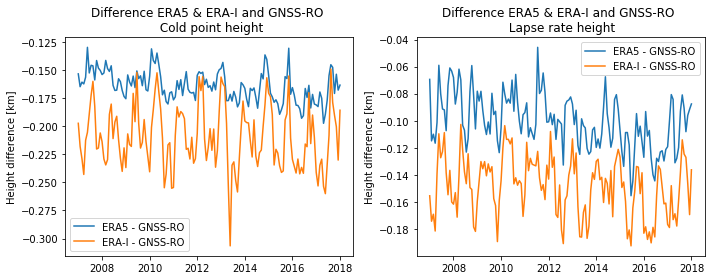

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.plot(yr,era_y_mean[1] - obs_y_mean[1], lw = 1.5, label = dlab1)
ax1.plot(yr, erai_y_mean[1] - obs_y_mean[1], lw = 1.5, label= dlab2)
#plt.ylim(-0.75,0.75)
ax1.set(title='Difference ERA5 & ERA-I and GNSS-RO \n Cold point height',
       ylabel='Height difference [km]')
ax1.legend()

ax2.plot(yr, era_y_mean[3] - obs_y_mean[3], lw = 1.5, label = dlab1)
ax2.plot(yr, erai_y_mean[3] - obs_y_mean[3], lw = 1.5, label = dlab2)
ax2.set(title='Difference ERA5 & ERA-I and GNSS-RO \n Lapse rate height',
       ylabel='Height difference [km]')
ax2.legend()

plt.tight_layout()

#plt.savefig('yearly_diff_height_cpt_lrt.png')

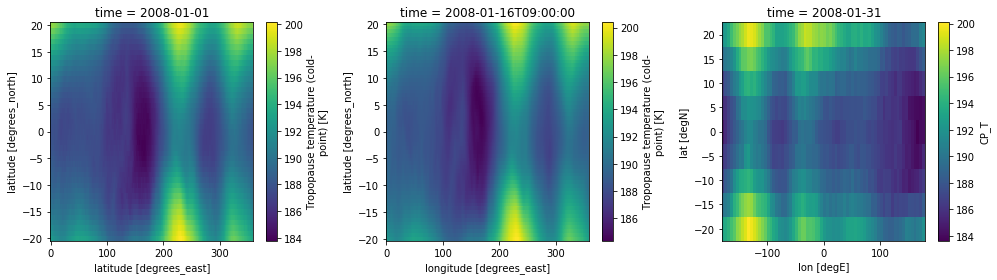

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

era_y.ctpt[12,:,:].plot(ax=ax1)
erai_y.ctpt[12,:,:].plot(ax=ax2)
obs_y.CP_T[12,:,:].plot(ax=ax3)

plt.tight_layout()
#f.savefig('latlon_cpt_jan08.png')

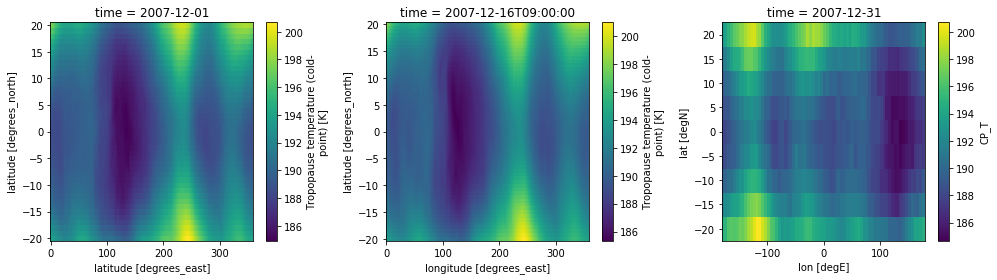

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

era_y.ctpt[11,:,:].plot(ax=ax1)
erai_y.ctpt[11,:,:].plot(ax=ax2)
obs_y.CP_T[11,:,:].plot(ax=ax3)

plt.tight_layout()
#f.savefig('latlon_cpt_dec07')

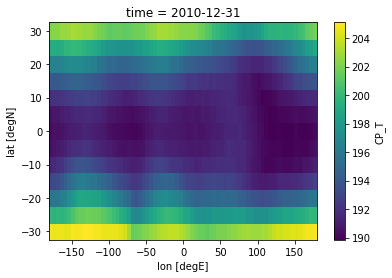

In [28]:
obs_y.CP_T[3,:,:].plot()

In [37]:
erai_pre = ds_erai.sel(time=slice('2000-01-15', '2010-12-15'))

In [27]:
ds_erai.time[200:]

<xarray.DataArray 'time' (time: 170)>
array(['1995-11-15T21:00:00.000000000', '1995-12-16T09:00:00.000000000',
       '1996-01-16T09:00:00.000000000', '1996-02-15T09:00:00.000000000',
       '1996-03-16T09:00:00.000000000', '1996-04-15T21:00:00.000000000',
       '2006-01-16T09:00:00.000000000', '2006-02-14T21:00:00.000000000',
       '2006-03-16T09:00:00.000000000', '2006-04-15T21:00:00.000000000',
       '2006-05-16T09:00:00.000000000', '2006-06-15T21:00:00.000000000',
       '2006-07-16T09:00:00.000000000', '2006-08-16T09:00:00.000000000',
       '2006-09-15T21:00:00.000000000', '2006-10-16T09:00:00.000000000',
       '2006-11-15T21:00:00.000000000', '2006-12-16T09:00:00.000000000',
       '2007-01-16T09:00:00.000000000', '2007-02-14T21:00:00.000000000',
       '2007-03-16T09:00:00.000000000', '2007-04-15T21:00:00.000000000',
       '2007-05-16T09:00:00.000000000', '2007-06-15T21:00:00.000000000',
       '2007-07-16T09:00:00.000000000', '2007-08-16T09:00:00.000000000',
       '2007-09-15T21:00:00.000000000', '2007-10-16T09:00:00.000000000',
       '2007-11-15T21:00:00.000000000', '2007-12-16T09:00:00.000000000',
       '2008-01-16T09:00:00.000000000', '2008-02-15T09:00:00.000000000',
       '2008-03-16T09:00:00.000000000', '2008-04-15T21:00:00.000000000',
       '2008-05-16T09:00:00.000000000', '2008-06-15T21:00:00.000000000',
       '2008-07-16T09:00:00.000000000', '2008-08-16T09:00:00.000000000',
       '2008-09-15T21:00:00.000000000', '2008-10-16T09:00:00.000000000',
       '2008-11-15T21:00:00.000000000', '2008-12-16T09:00:00.000000000',
       '2009-01-16T09:00:00.000000000', '2009-02-14T21:00:00.000000000',
       '2009-03-16T09:00:00.000000000', '2009-04-15T21:00:00.000000000',
       '2009-05-16T09:00:00.000000000', '2009-06-15T21:00:00.000000000',
       '2009-07-16T09:00:00.000000000', '2009-08-16T09:00:00.000000000',
       '2009-09-15T21:00:00.000000000', '2009-10-16T09:00:00.000000000',
       '2009-11-15T21:00:00.000000000', '2009-12-16T09:00:00.000000000',
       '2010-01-16T09:00:00.000000000', '2010-02-14T21:00:00.000000000',
       '2010-03-16T09:00:00.000000000', '2010-04-15T21:00:00.000000000',
       '2010-05-16T09:00:00.000000000', '2010-06-15T21:00:00.000000000',
       '2010-07-16T09:00:00.000000000', '2010-08-16T09:00:00.000000000',
       '2010-09-15T21:00:00.000000000', '2010-10-16T09:00:00.000000000',
       '2010-11-15T21:00:00.000000000', '2010-12-16T09:00:00.000000000',
       '2011-01-16T09:00:00.000000000', '2011-02-14T21:00:00.000000000',
       '2011-03-16T09:00:00.000000000', '2011-04-15T21:00:00.000000000',
       '2011-05-16T09:00:00.000000000', '2011-06-15T21:00:00.000000000',
       '2011-07-16T09:00:00.000000000', '2011-08-16T09:00:00.000000000',
       '2011-09-15T21:00:00.000000000', '2011-10-16T09:00:00.000000000',
       '2011-11-15T21:00:00.000000000', '2011-12-16T09:00:00.000000000',
       '2012-01-16T09:00:00.000000000', '2012-02-15T09:00:00.000000000',
       '2012-03-16T09:00:00.000000000', '2012-04-15T21:00:00.000000000',
       '2012-05-16T09:00:00.000000000', '2012-06-15T21:00:00.000000000',
       '2012-07-16T09:00:00.000000000', '2012-08-16T09:00:00.000000000',
       '2012-09-15T21:00:00.000000000', '2012-10-16T09:00:00.000000000',
       '2012-11-15T21:00:00.000000000', '2012-12-16T09:00:00.000000000',
       '2013-01-16T09:00:00.000000000', '2013-02-14T21:00:00.000000000',
       '2013-03-16T09:00:00.000000000', '2013-04-15T21:00:00.000000000',
       '2013-05-16T09:00:00.000000000', '2013-06-15T21:00:00.000000000',
       '2013-07-16T09:00:00.000000000', '2013-08-16T09:00:00.000000000',
       '2013-09-15T21:00:00.000000000', '2013-10-16T09:00:00.000000000',
       '2013-11-15T21:00:00.000000000', '2013-12-16T09:00:00.000000000',
       '2014-01-16T09:00:00.000000000', '2014-02-14T21:00:00.000000000',
       '2014-03-16T09:00:00.000000000', '2014-04-15T21:00:00.000000000',
       '2014-05-16T09:00:00.000000000', '2014-06-15T21:00:00.000000000',
       '2014-07-16T0

In [42]:
erai_pre.ctpt.time

<xarray.DataArray 'time' (time: 59)>
array(['2006-01-16T09:00:00.000000000', '2006-02-14T21:00:00.000000000',
       '2006-03-16T09:00:00.000000000', '2006-04-15T21:00:00.000000000',
       '2006-05-16T09:00:00.000000000', '2006-06-15T21:00:00.000000000',
       '2006-07-16T09:00:00.000000000', '2006-08-16T09:00:00.000000000',
       '2006-09-15T21:00:00.000000000', '2006-10-16T09:00:00.000000000',
       '2006-11-15T21:00:00.000000000', '2006-12-16T09:00:00.000000000',
       '2007-01-16T09:00:00.000000000', '2007-02-14T21:00:00.000000000',
       '2007-03-16T09:00:00.000000000', '2007-04-15T21:00:00.000000000',
       '2007-05-16T09:00:00.000000000', '2007-06-15T21:00:00.000000000',
       '2007-07-16T09:00:00.000000000', '2007-08-16T09:00:00.000000000',
       '2007-09-15T21:00:00.000000000', '2007-10-16T09:00:00.000000000',
       '2007-11-15T21:00:00.000000000', '2007-12-16T09:00:00.000000000',
       '2008-01-16T09:00:00.000000000', '2008-02-15T09:00:00.000000000',
       '2008-03-16T09:00:00.000000000', '2008-04-15T21:00:00.000000000',
       '2008-05-16T09:00:00.000000000', '2008-06-15T21:00:00.000000000',
       '2008-07-16T09:00:00.000000000', '2008-08-16T09:00:00.000000000',
       '2008-09-15T21:00:00.000000000', '2008-10-16T09:00:00.000000000',
       '2008-11-15T21:00:00.000000000', '2008-12-16T09:00:00.000000000',
       '2009-01-16T09:00:00.000000000', '2009-02-14T21:00:00.000000000',
       '2009-03-16T09:00:00.000000000', '2009-04-15T21:00:00.000000000',
       '2009-05-16T09:00:00.000000000', '2009-06-15T21:00:00.000000000',
       '2009-07-16T09:00:00.000000000', '2009-08-16T09:00:00.000000000',
       '2009-09-15T21:00:00.000000000', '2009-10-16T09:00:00.000000000',
       '2009-11-15T21:00:00.000000000', '2009-12-16T09:00:00.000000000',
       '2010-01-16T09:00:00.000000000', '2010-02-14T21:00:00.000000000',
       '2010-03-16T09:00:00.000000000', '2010-04-15T21:00:00.000000000',
       '2010-05-16T09:00:00.000000000', '2010-06-15T21:00:00.000000000',
       '2010-07-16T09:00:00.000000000', '2010-08-16T09:00:00.000000000',
       '2010-09-15T21:00:00.000000000', '2010-10-16T09:00:00.000000000',
       '2010-11-15T21:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T09:00:00 ... 2010-11-15T21:00:00
Attributes:
    long_name:     time
    cell_methods:  time: mean

In [38]:
era_pre_av = func.w_average(erai_pre, ['ctpt'])

In [39]:
era_pre_av[0]

array([200.85366821, 200.95826721, 201.25564575, 201.84872437,
       201.78334045, 201.57827759, 201.45742798, 202.00941467,
       202.43611145, 201.72506714, 201.55178833, 201.08244324,
       201.4519043 , 201.60163879, 201.9311676 , 202.08300781,
       201.98762512, 201.92108154, 202.07862854, 202.48173523,
       202.58099365, 202.17744446, 201.72206116, 201.2256012 ,
       201.06684875, 201.42144775, 202.03833008, 201.87406921,
       201.74584961, 201.5954895 , 201.71763611, 202.34008789,
       202.4942627 , 202.30873108, 201.56900024, 200.98681641,
       201.08338928, 201.4601593 , 201.56939697, 202.28173828,
       202.25424194, 201.8838501 , 201.87867737, 202.52198792,
       202.77909851, 202.25569153, 201.69007874, 201.20892334,
       201.21614075, 201.59779358, 202.17974854, 202.36170959,
       202.29748535, 202.22187805, 202.25405884, 202.79023743,
       202.90309143, 202.30543518, 201.86001587])

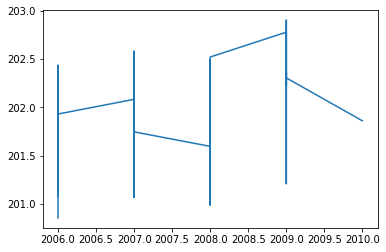

In [40]:
xax = np.linspace(2006,2010,59, dtype=int)

plt.figure()
plt.plot(xax,era_pre_av[0])